<a href="https://colab.research.google.com/github/lmkelly16/BYU-REU-2022/blob/main/all_the_loops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import pandas as pd
import numpy as np
import glob
import gdal

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing files for images
c = controls
d = drug

In [3]:
''' Control A List '''
#import it
img_list_cA = glob.glob('/content/drive/MyDrive/BYU_REU_images/*Z+A.tiff')
#sort it
img_list_cA= np.sort(img_list_cA)

''' Control B List '''
#import it
img_list_cB = glob.glob('/content/drive/MyDrive/BYU_REU_images/*Z+B.tiff')

#sort it
img_list_cB= np.sort(img_list_cB)

''' Control B List'''
#import it
img_list_cC = glob.glob('/content/drive/MyDrive/BYU_REU_images/*Z+C.tiff')

#sort it
img_list_cC= np.sort(img_list_cC)

''' Drug A List '''
#import it
img_list_dA = glob.glob('/content/drive/MyDrive/BYU_REU_images/*Z44A.tiff')

#sort it
img_list_dA= np.sort(img_list_dA)

''' Drug B List '''
#import it
img_list_dB = glob.glob('/content/drive/MyDrive/BYU_REU_images/*Z44B.tiff')

#sort it
img_list_dB= np.sort(img_list_dB)

''' Drug C List '''
#import it
img_list_dC = glob.glob('/content/drive/MyDrive/BYU_REU_images/*Z44C.tiff')

#sort it
img_list_dC= np.sort(img_list_dC)

#check to make sure it looks right
#img_list_dB

Thresholding values (Best ones)
- cA: 35
- cB: 30
- cC: 35
- dA: 33
- dB: 27
- dC

Area lists for each set of images

In [ ]:
''' Control A '''
# FIXME

area_list=[]

for i in range(len(img_list_cA)):
  
  zone_area_list_cA=[]

  # Load the phase contrast image.
  im = skimage.io.imread(img_list_cA[i])
  cim = im[:,:,0]

  # Threshold value, as obtained by eye
  im_thresh = 35

  # Generate thresholded image
  im_bw = cim < im_thresh

  # labels whatever you segmented out (bacteria for example)
  labeled = skimage.measure.label(im_bw)

  #make an area list wheeeee!
  for i in range(len(labeled)):
    bacteria = (labeled == i)
    area=bacteria.sum()
    area_list.append(area)

  for i in area_list:
    if i > 50000 and i < 300000:
      zone_area_list_cA.append(i)

zone_area_list_cA

[121583, 167754, 163781]

In [ ]:
''' Control B: my current favorite control'''
#zone_area_list_cB[3] causes problems... everything else works decent

area_list=[]

for i in range(len(img_list_cB)):
  
  zone_area_list_cB=[] 

  # Load the phase contrast image.
  im = skimage.io.imread(img_list_cB[i])
  cim = im[:,:,0]

  # Threshold value, as obtained by eye
  im_thresh = 30

  # Generate thresholded image
  im_bw = cim < im_thresh

  # labels whatever you segmented out (bacteria for example)
  labeled = skimage.measure.label(im_bw)

  #make an area list wheeeee!
  for i in range(len(labeled)):
    bacteria = (labeled == i)
    area=bacteria.sum()
    area_list.append(area)

  for i in area_list:
    if i > 50000 and i < 300000:
      zone_area_list_cB.append(i)

zone_area_list_cB

[163067, 179912, 170840, 105597]

In [ ]:
''' Control C '''
# zone_area_list_cC[3] causes problems, but the rest works well

area_list=[]

for i in range(len(img_list_cC)):
  
  zone_area_list_cC=[]

  # Load the phase contrast image.
  im = skimage.io.imread(img_list_cC[i])
  cim = im[:,:,0]

  # Threshold value, as obtained by eye
  im_thresh = 35

  # Generate thresholded image
  im_bw = cim < im_thresh

  # labels whatever you segmented out (bacteria for example)
  labeled = skimage.measure.label(im_bw)

  #make an area list wheeeee!
  for i in range(len(labeled)):
    bacteria = (labeled == i)
    area=bacteria.sum()
    area_list.append(area)

  for i in area_list:
    if i > 10000 and i < 300000:
      zone_area_list_cC.append(i)

zone_area_list_cC

[128657, 188003, 194787, 68613]

In [ ]:
''' Drug A '''
# zone_area_list_dA[4] gives two area values and idk why

area_list=[]

for i in range(len(img_list_dA)):
  
  zone_area_list_dA=[]

  # Load the phase contrast image.
  im = skimage.io.imread(img_list_dA[i])
  cim = im[:,:,0]

  # Threshold value, as obtained by eye
  im_thresh = 30

  # Generate thresholded image
  im_bw = cim < im_thresh

  # labels whatever you segmented out (bacteria for example)
  labeled = skimage.measure.label(im_bw)

  #make an area list wheeeee!
  for i in range(len(labeled)):
    bacteria = (labeled == i)
    area=bacteria.sum()
    area_list.append(area)

  for i in area_list:
    if i > 60000 and i < 200000:
      zone_area_list_dA.append(i)

zone_area_list_dA

[143729, 193667, 173230, 76444, 132956]

In [ ]:
''' Drug B '''

area_list=[]

for i in range(0,4):
  
  zone_area_list_dB=[]

  # Load the phase contrast image.
  im = skimage.io.imread(img_list_dB[i])
  cim = im[:,:,0]

  # Threshold value, as obtained by eye
  im_thresh = 27

  # Generate thresholded image
  im_bw = cim < im_thresh

  # labels whatever you segmented out (bacteria for example)
  labeled = skimage.measure.label(im_bw)

  #make an area list wheeeee!
  for i in range(len(labeled)):
    bacteria = (labeled == i)
    area=bacteria.sum()
    area_list.append(area)

  for i in area_list:
    if i > 50000 and i < 300000:
      zone_area_list_dB.append(i)

zone_area_list_dB

[186194, 189611, 183230, 60533]

In [ ]:
''' Control C '''



Attempting to make a graph

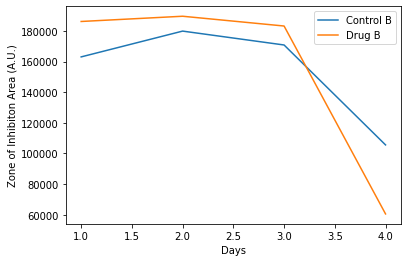

In [ ]:
days=[1,2,3,4]
x = zone_area_list_cB
y = zone_area_list_dB

plt.plot(days, x)
plt.plot(days, y)
plt.xlabel('Days')
plt.ylabel('Zone of Inhibiton Area (A.U.)')
plt.legend(["Control B", "Drug B"]);

Run images through this section to check the thresholding values!

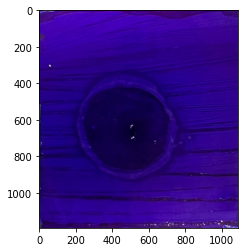

In [76]:
# Load the phase contrast image.
im = skimage.io.imread(img_list_cC[5])

# see how good the contrast is
cim = im[:,:,0]

# look at it
plt.imshow(im);

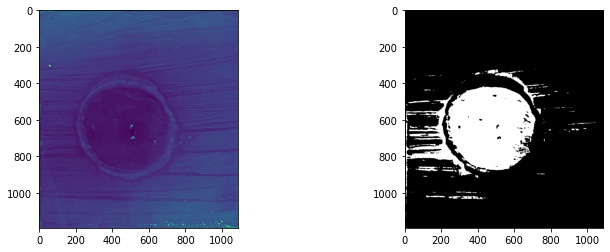

In [81]:
''' Thresholding '''
# Threshold value, as obtained by eye
im_thresh = 25

# Generate thresholded image
im_bw = cim < im_thresh

# plot orginal and thresholded next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(cim)
ax[1].imshow(im_bw, cmap=plt.cm.gray);

Thresholding values (Best ones)
cA: 35
cB: 30
cC: 35
dA: 33
dB: 27
dC

In [ ]:
''' The place to fix/check the area loop and its *issues* '''

area_list=[]

for i in range(0,5):

  zone_area_list_fix=[]
  
  # Load the phase contrast image.
  im = skimage.io.imread(img_list_dA[i])
  cim = im[:,:,0]

  # Threshold value, as obtained by eye
  im_thresh = 33

  # Generate thresholded image
  im_bw = cim < im_thresh

  # labels whatever you segmented out (bacteria for example)
  labeled = skimage.measure.label(im_bw)

  #make an area list wheeeee!
  for i in range(len(labeled)):
    bacteria = (labeled == i)
    area=bacteria.sum()
    area_list.append(area)

  for i in area_list:
    if i > 50000 and i < 300000:
      zone_area_list_fix.append(i)

zone_area_list_fix

[144745, 199493, 175665, 113599, 147226, 80624]